In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PROJECT_DIRECTORY = '/Users/duncan/Projects/intrinsic_alignments/'

# load galaxy catalog

In [4]:
from intrinsic_alignments.data.MB2_subfind_cat_utils import MBII_galaxy_catalog

catalog = MBII_galaxy_catalog(0.06)
Lbox = np.array([100.0,100.0,100.0])
dm_particle_mass = 1.1*10**7

ValueError: attempt to get argmin of an empty sequence

In [3]:
for name in catalog.galaxy_table.dtype.names:
    print(name)

NameError: name 'catalog' is not defined

In [7]:
Ngal = len(catalog.galaxy_table)
print("number of galaxies: ", Ngal)

# check centrals and satellite

centrals = (catalog.galaxy_table['central']==1)
satellites = (catalog.galaxy_table['central']==0)

Ngal = len(catalog.galaxy_table)

print("satellite fraction: ", np.sum(satellites)/Ngal)

# get index of central galaxy
from halotools.utils import crossmatch
central_indices = (np.arange(0,Ngal).astype('int'))[centrals]
inds1, inds2 = crossmatch(catalog.galaxy_table['host_halo_id'], catalog.galaxy_table['host_halo_id'][centrals])
index_of_central = np.arange(0,Ngal).astype('int')
index_of_central[inds1] = central_indices[inds2]

number of galaxies:  4633801
satellite fraction:  0.25415290816329833


In [8]:
# get galaxy/halo coordinates in halotools format
coords = np.vstack((catalog.galaxy_table['x'],
                    catalog.galaxy_table['y'],
                    catalog.galaxy_table['z'])).T

# caclulate ellipticites and axis ratios
q_dm = catalog.galaxy_table['shapesDM.q3d']
e_dm = (1.0-q_dm)/(1.0+q_dm**2)
s_dm = catalog.galaxy_table['shapesDM.s3d']

q_gal = catalog.galaxy_table['shapesStar.q3d']
e_gal = (1.0-q_gal)/(1.0+q_gal**2)
s_gal = catalog.galaxy_table['shapesStar.s3d']

q_dm = catalog.galaxy_table['shapesDM.q2d']
proj_e_dm = (1.0-q_dm)/(1.0+q_dm**2)

q_gal = catalog.galaxy_table['shapesStar.q2d']
proj_e_gal = (1.0-q_gal)/(1.0+q_gal**2)

# calculate orientations
orientation_dm_1 = np.vstack((catalog.galaxy_table['shapesDM.a3d_x'],
                              catalog.galaxy_table['shapesDM.a3d_y'],
                              catalog.galaxy_table['shapesDM.a3d_z'])).T

orientation_dm_2 = np.vstack((catalog.galaxy_table['shapesDM.c3d_x'],
                              catalog.galaxy_table['shapesDM.c3d_y'],
                              catalog.galaxy_table['shapesDM.c3d_z'])).T

orientation_gal_1 = np.vstack((catalog.galaxy_table['shapesStar.a3d_x'],
                               catalog.galaxy_table['shapesStar.a3d_y'],
                               catalog.galaxy_table['shapesStar.a3d_z'])).T

orientation_gal_2 = np.vstack((catalog.galaxy_table['shapesStar.c3d_x'],
                               catalog.galaxy_table['shapesStar.c3d_y'],
                               catalog.galaxy_table['shapesStar.c3d_z'])).T

proj_orientation_dm = np.vstack((catalog.galaxy_table['shapesDM.a2d_x'],
                                 catalog.galaxy_table['shapesDM.a2d_y'])).T

proj_orientation_gal = np.vstack((catalog.galaxy_table['shapesStar.a2d_x'],
                                  catalog.galaxy_table['shapesStar.a2d_y'])).T

In [9]:
# calculate radial vector for satellites
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
sat_alignment_model = RadialSatelliteAlignment(Lbox=Lbox)

halo_x = catalog.galaxy_table['x'][index_of_central]
halo_y = catalog.galaxy_table['y'][index_of_central]
halo_z = catalog.galaxy_table['z'][index_of_central]
x = catalog.galaxy_table['x']
y = catalog.galaxy_table['y']
z = catalog.galaxy_table['z']

cen_sat_direction, r = sat_alignment_model.get_radial_vector(x=x, y=y, z=z,
                                                             halo_x=halo_x,
                                                             halo_y=halo_y,
                                                             halo_z=halo_z)

dx = cen_sat_direction[:,0]
dy = cen_sat_direction[:,1]
dz = cen_sat_direction[:,2]

In [10]:
random_orientations = np.random.random((Ngal,3))*2.0 - 1.0
random_proj_orientations = np.random.random((Ngal,2))*2.0 - 1.0

# galaxy misalignments

In [11]:
from halotools.utils import normalized_vectors, angles_between_list_of_vectors
from intrinsic_alignments.ia_models.utils import symmetrize_angular_distribution

In [12]:
# major axis-major-axis alignment
alignment_vectors = orientation_dm_1
alignment_vectors[satellites] = cen_sat_direction[satellites]

theta_misalignment_1 = angles_between_list_of_vectors(alignment_vectors, orientation_gal_1)
theta_misalignment_1 = symmetrize_angular_distribution(theta_misalignment)
theta_misalignment_1 = np.nan_to_num(theta_misalignment)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


NameError: name 'theta_misalignment' is not defined

In [13]:
# minor axis-minor axis alignment
alignment_vectors = orientation_dm_2
alignment_vectors[satellites] = cen_sat_direction[satellites]

theta_misalignment_2 = angles_between_list_of_vectors(alignment_vectors, orientation_gal_2)
theta_misalignment_2 = symmetrize_angular_distribution(theta_misalignment_2)
theta_misalignment_2 = np.nan_to_num(theta_misalignment_2)

[0.82821515]
[0.45790297]


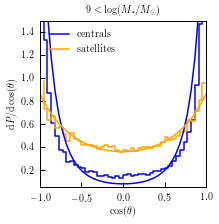

In [14]:
from intrinsic_alignments.ia_models.ia_model_components import DimrothWatson, inverse_alignment_strenth
dist = DimrothWatson()

# centrals
mask = (catalog.galaxy_table['m_star']>10**9) & centrals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment_1[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

k1 = dist.fit(x, floc=0, fscale=1)[0]
f1 = dist.pdf(costheta_bins, k=k1)
print(inverse_alignment_strenth(k1))

#satellites
mask = (catalog.galaxy_table['m_star']>10**9) & satellites

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment_1[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

k2 = dist.fit(x, floc=0, fscale=1)[0]
f2 = dist.pdf(costheta_bins, k=k2)
print(inverse_alignment_strenth(k2))

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bins[1:], normalized_counts_1, color='blue')
p2, = plt.step(costheta_bins[1:], normalized_counts_2, color='orange')
plt.plot(costheta_bins, f1, color='blue')
plt.plot(costheta_bins, f2, color='orange')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.ylim([0.05,1.5])
plt.xlim([-1,1])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.title(r'$9<\log(M_*/M_{\odot})$')
plt.show()

filename = "galaxy_misalignment_dist.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

[0.8899107]
[-0.50636999]


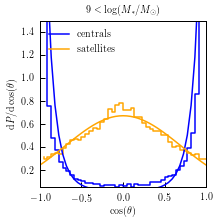

In [15]:
from intrinsic_alignments.ia_models.ia_model_components import DimrothWatson, inverse_alignment_strenth
dist = DimrothWatson()

# centrals
mask = (catalog.galaxy_table['m_star']>10**9) & centrals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

k1 = dist.fit(x, floc=0, fscale=1)[0]
f1 = dist.pdf(costheta_bins, k=k1)
print(inverse_alignment_strenth(k1))

# satellites
mask = (catalog.galaxy_table['m_star']>10**9) & satellites

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

k2 = dist.fit(x, floc=0, fscale=1)[0]
f2 = dist.pdf(costheta_bins, k=k2)
print(inverse_alignment_strenth(k2))

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bins[1:], normalized_counts_1, color='blue')
p2, = plt.step(costheta_bins[1:], normalized_counts_2, color='orange')
plt.plot(costheta_bins, f1, color='blue')
plt.plot(costheta_bins, f2, color='orange')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.ylim([0.05,1.5])
plt.xlim([-1,1])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.title(r'$9<\log(M_*/M_{\odot})$')
plt.show()

filename = "galaxy_misalignment_dist.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

# binary population

In [20]:
color = (catalog.galaxy_table['SDSS_u'] - catalog.galaxy_table['SDSS_r'])
red = (color > 1.5)
blue = (color <= 1.5)

In [21]:
disks = catalog.galaxy_table['b_to_t'] <= 0.7
ellipticals = catalog.galaxy_table['b_to_t'] > 0.7

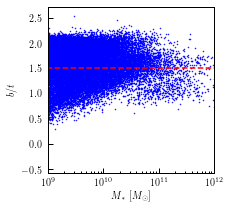

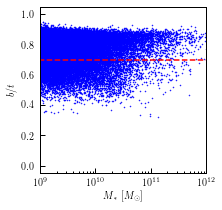

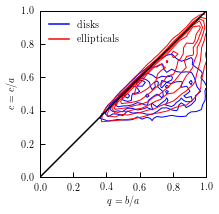

In [22]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(catalog.galaxy_table['m_star'], color, '.', ms=1, alpha=1, color='blue')
plt.plot([10,10**13],[1.5,1.5], '--', color='red')
plt.xscale('log')
plt.xlim([10**9,10**12])
plt.xlabel(r'$M_{*}~[M_{\odot}]$')
plt.ylabel(r'$b/t$')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(catalog.galaxy_table['m_star'], catalog.galaxy_table['b_to_t'], '.', ms=1, alpha=1, color='blue')
plt.plot([10,10**13],[0.7,0.7], '--', color='red')
plt.xscale('log')
plt.xlim([10**9,10**12])
plt.xlabel(r'$M_{*}~[M_{\odot}]$')
plt.ylabel(r'$b/t$')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)

mask = (catalog.galaxy_table['m_star']>10.0**9.0) & disks
counts, xbins, ybins=np.histogram2d(q_gal[mask], s_gal[mask], bins=25)
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='blue',
    linestyles='solid')

mask = (catalog.galaxy_table['m_star']>10.0**9.0) & ellipticals
counts, xbins, ybins=np.histogram2d(q_gal[mask], s_gal[mask], bins=25)
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='red',
    linestyles='solid')

plt.plot([0,1], [0,1], color='black')
plt.xlim([0,1])
plt.ylim([0,1])
p1, = plt.plot([-1,-1],[-1,-1], color='blue')
p2, = plt.plot([-1,-1],[-1,-1], color='red')
plt.legend([p1,p2], ['disks','ellipticals'], loc='upper left', fontsize=10, frameon=False)
plt.xlabel(r'$q=b/a$')
plt.ylabel(r'$c=c/a$')
plt.show()

filename = "disk_elliptical_axis_ratios.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

# measure ED and EE functions

In [23]:
from halotools.mock_observables.alignments import ee_3d, ed_3d

rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

In [172]:
# all galaxies
mask = (catalog.galaxy_table['m_star']>10**9.5)
print("number of haloes: ", np.sum(mask))

result_ee_1 = ee_3d(coords[mask], orientation_gal_1[mask], coords[mask], orientation_gal_1[mask], rbins, period=Lbox)
result_ed_1 = ed_3d(coords[mask], orientation_gal_1[mask], coords[mask], rbins, period=Lbox)

number of haloes:  18739


In [25]:
# blue galaxies
mask = (catalog.galaxy_table['m_star']>10**9) & red
print("number of haloes: ", np.sum(mask))

result_ee_2 = ee_3d(coords[mask], orientation_gal_1[mask], coords[mask], orientation_gal_1[mask], rbins, period=Lbox)
result_ed_2 = ed_3d(coords[mask], orientation_gal_1[mask], coords[mask], rbins, period=Lbox)

number of haloes:  47162


In [26]:
# red galaxies
mask = (catalog.galaxy_table['m_star']>10**9) & blue
print("number of haloes: ", np.sum(mask))

result_ee_3 = ee_3d(coords[mask], orientation_gal_1[mask], coords[mask], orientation_gal_1[mask], rbins, period=Lbox)
result_ed_3 = ed_3d(coords[mask], orientation_gal_1[mask], coords[mask], rbins, period=Lbox)

number of haloes:  9288


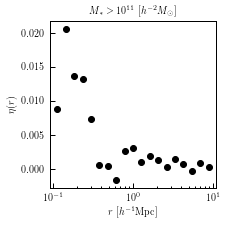

In [173]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{11} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l2, = ax.plot(rbin_centers, result_ee_1, 'o', color='black')
#l2, = ax.plot(rbin_centers, result_ee_2, 'o', color='red')
#l2, = ax.plot(rbin_centers, result_ee_3, 'o', color='blue')
plt.show()

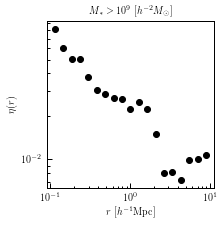

In [174]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{9} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l2, = ax.plot(rbin_centers, result_ed_1, 'o', color='black')
#l2, = ax.plot(rbin_centers, result_ed_2, 'o', color='red')
#l2, = ax.plot(rbin_centers, result_ed_3, 'o', color='blue')
plt.show()

## halo mass dependence

In [124]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 2

# check for halo mass dependence 
mbins = np.logspace(10.0,14.0,20)
mbin_centers = (mbins[:-1]+mbins[1:])/2.0

mask = centrals & (table['m_star']>10**9)
x = np.cos(theta_misalignment_1)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p, err_p = binned_bootstrap_1d(catalog.galaxy_table['halo_mass'][mask], x[mask], mbins,
                               statistic=statisic, Nboot=Nboot)

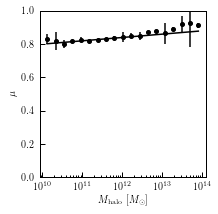

In [138]:
from intrinsic_alignments.ia_models.ia_model_components import HaloMassCentralAlignmentStrength
central_aligment_strength = HaloMassCentralAlignmentStrength(central_alignment_gamma=0.6, central_alignment_a=0.02)

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(mbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot(mbin_centers, central_aligment_strength.alignment_strength_mass_dependence(mbin_centers), '-', color='black')
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel(r'$M_{\rm halo}~[M_{\odot}]$')
ax.set_ylabel(r'$\mu$')
plt.show()

filename = "measured_halo_mass_central_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

## stellar mass dependence

In [181]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 2

# check for halo mass dependence 
mbins = np.logspace(9.0,12.0,15)
mbin_centers = (mbins[:-1]+mbins[1:])/2.0

mask = centrals & (table['m_star']>10**9)
x = np.cos(theta_misalignment_1)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p, err_p = binned_bootstrap_1d(catalog.galaxy_table['m_star'][mask], x[mask], mbins,
                               statistic=statisic, Nboot=Nboot)

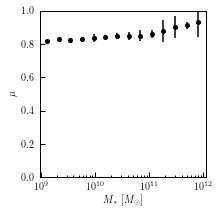

In [182]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(mbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel(r'$M_{*}~[M_{\odot}]$')
ax.set_ylabel(r'$\mu$')
plt.show()

## radial dependence

In [179]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 2

# check for halo mass dependence 
rbins = np.logspace(-1,0.5,10)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

mask = satellites & (table['m_star']>10**9.0)
x = np.cos(theta_misalignment_1)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p, err_p = binned_bootstrap_1d(r[mask], x[mask], rbins,
                               statistic=statisic, Nboot=Nboot)

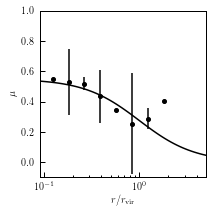

In [180]:
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignmentStrength
satellite_aligment_strength = RadialSatelliteAlignmentStrength(satellite_alignment_a=0.55, satellite_alignment_gamma=1.5)

r_sample = np.logspace(-2,1,100)

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(rbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot(r_sample , satellite_aligment_strength.alignment_strength_radial_dependence(r_sample), '-', color='black')
ax.set_ylim([-0.1,1])
ax.set_xlim([0.09,5])
ax.set_xscale('log')
ax.set_xlabel(r'$r/r_{\rm vir}$')
ax.set_ylabel(r'$\mu$')
plt.show()

filename = "measured_radial_satellite_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

# Model Alignment Correlations

In [80]:
from astropy.table import Table
table = Table(catalog.galaxy_table)
table['halo_x'] =catalog.galaxy_table['x'][index_of_central]
table['halo_y'] =catalog.galaxy_table['y'][index_of_central]
table['halo_z'] =catalog.galaxy_table['z'][index_of_central]
table['halo_rvir'] = catalog.galaxy_table['host_virial_radius']
table['halo_mvir'] = catalog.galaxy_table['host_halo_mass']
table['halo_axisA_x'] = catalog.galaxy_table['shapesDM.a3d_x']
table['halo_axisA_y'] = catalog.galaxy_table['shapesDM.a3d_y']
table['halo_axisA_z'] = catalog.galaxy_table['shapesDM.a3d_z']
table['gal_type'] = 'satellites'
table['gal_type'][centrals] = 'centrals'

In [193]:
from intrinsic_alignments.ia_models.ia_model_components import CentralAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
cen_alignment_model = CentralAlignment(central_alignment_strength=0.8)
sat_alignment_model = RadialSatelliteAlignment(satellite_alignment_strength=0.4, Lbox=Lbox)
#satellite_aligment_strength = RadialSatelliteAlignmentStrength(satellite_alignment_a=0.55, satellite_alignment_gamma=1.5)
#central_aligment_strength = HaloMassCentralAlignmentStrength(central_alignment_gamma=0.6, central_alignment_a=0.02)

In [194]:
#table = Table(np.copy(central_aligment_strength.assign_central_alignment_strength(table=table))) 
#table = Table(np.copy(satellite_aligment_strength.assign_satellite_alignment_strength(table=table,  Lbox=Lbox))) 

table = Table(np.copy(cen_alignment_model.assign_central_orientation(table=table)))
table = Table(np.copy(sat_alignment_model.assign_satellite_orientation(table=table)))

In [195]:
gal_coords = np.vstack((table['x'],
                        table['y'],
                        table['z'])).T

gal_orientation = np.vstack((table['galaxy_axisA_x'],
                             table['galaxy_axisA_y'],
                             table['galaxy_axisA_z'])).T

host_id = table['host_halo_id']

In [196]:
from halotools.mock_observables.alignments import ee_3d, ed_3d, ed_3d_one_two_halo_decomp, ee_3d_one_two_halo_decomp

rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

In [197]:
# all galaxies
mask = (table['m_star']>10**9.0)
print("number of galaxies: ", np.sum(mask))

result_ee_11 = ee_3d(gal_coords[mask], gal_orientation[mask], gal_coords[mask], gal_orientation[mask], rbins, period=Lbox)
result_ed_11 = ed_3d(gal_coords[mask], gal_orientation[mask], gal_coords[mask], rbins, period=Lbox)


number of galaxies:  56450


In [198]:
result_ee_11_1h, result_ee_11_2h = ee_3d_one_two_halo_decomp(gal_coords[mask], gal_orientation[mask], host_id[mask], gal_coords[mask], gal_orientation[mask], host_id[mask], rbins, period=Lbox)
result_ed_11_1h, result_ed_11_2h = ed_3d_one_two_halo_decomp(gal_coords[mask], gal_orientation[mask], host_id[mask], gal_coords[mask], host_id[mask], rbins, period=Lbox)


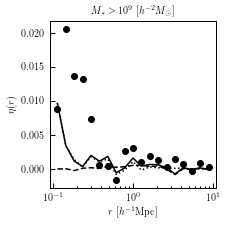

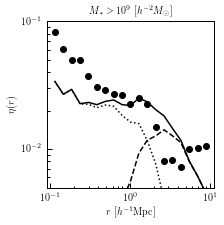

In [199]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{9} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l2, = ax.plot(rbin_centers, result_ee_1, 'o', color='black')
l2, = ax.plot(rbin_centers, result_ee_11, '-', color='black')
l2, = ax.plot(rbin_centers, result_ee_11_1h, ':', color='black')
l2, = ax.plot(rbin_centers, result_ee_11_2h, '--', color='black')
plt.show()

fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{9} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.005,0.1])
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l2, = ax.plot(rbin_centers, result_ed_1, 'o', color='black')
l2, = ax.plot(rbin_centers, result_ed_11, '-', color='black')
l2, = ax.plot(rbin_centers, result_ed_11_1h, ':', color='black')
l2, = ax.plot(rbin_centers, result_ed_11_2h, '--', color='black')
plt.show()